# Part14 - Initial Data Exploration and Preparation

The first part of any data analysis or predictive modeling task is an initial exploration of the data, since oddities in the data can cause bugs and muddle your results.  Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data.

In this lesson, we will explore the Titanic disaster training set available from Kaggle.com
https://www.kaggle.com/c/titanic/data

## Exploring the Variables
The first step in exploratory analysis is reading in the data and exploring the variables. This involves getting to know how many variables there are, the data type of those variables, the range of values those variables could take, so on.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os

os.chdir('/home/sindhuvarun/github/ML-Learning/staticsAndProbability/PythonForDataAnalytics/dataset/Titanic')
titanic_train = pd.read_csv('train.csv')

<font size="3">__ Check the dimensions of the data: <br>

df.shape --> number of rows and columns<br>

df.dtypes --> datatype of each column attribute __</font>

In [2]:
titanic_train.shape

(891, 12)

In [3]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font size=3> __df.describe(): statistical summary of the variables__ </font>
Non-numeric columns is dropped from the output of df.describe()

In [7]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# To get summary of categorical variables, pass only those variables to df.describe()
categorical = titanic_train.dtypes[titanic_train.dtypes=="object"].index
print(categorical)
titanic_train[categorical].describe()
# The summary for categorical variable shows:
# 1 . Count of non-NaN records
# 2. number of unique categories
# 3. most frequently occuring values
# 4. number of occurrence of the most frequent value

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gill, Mr. John William",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
titanic_train.dtypes[titanic_train.dtypes=="object"]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [12]:
type(titanic_train.dtypes[titanic_train.dtypes=="object"])

pandas.core.series.Series

 #### After looking at the data for the first time, you should ask yourself a few questions:

####    Do I need all of the variables?
#### Should I transform any variables?
####    Are there NA values, outliers or other strange values?
####    Should I create new variables?


####    Do I need all of the variables?
Kaggle provides this description for the data:
 VARIABLE DESCRIPTIONS:
 passengerId
 survival        Survival
                 (0 = No; 1 = Yes)
 pclass          Passenger Class
                 (1 = 1st; 2 = 2nd; 3 = 3rd)
 name            Name
 sex             Sex
 age             Age
 sibsp           Number of Siblings/Spouses Aboard
 parch           Number of Parents/Children Aboard
 ticket          Ticket Number
 fare            Passenger Fare
 cabin           Cabin
 embarked        Port of Embarkation
                 (C = Cherbourg; Q = Queenstown; S = Southampton)

PassengerId and ticket are not of use for prediction and hence we remove it.

In [16]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

In [17]:
titanic_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Should I Transform Any Variables?
Pclass has values - 1,2,3. Which stand for class1, class2 and class3.
Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

In [22]:
new_Pclass = pd.Categorical(titanic_train['Pclass'], ordered=True)
#type(new_Pclass)
new_Pclass = new_Pclass.rename_categories(['Class1', 'Class2', 'Class3'])
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [24]:
titanic_train['Pclass'] = new_Pclass
titanic_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [21]:
new_Pclass.categories

Int64Index([1, 2, 3], dtype='int64')

Cabin Variable:
Cabin name has a Capital letter in the beginning. Grouping cabins by these letters could be of some help for prediction

In [25]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
char_cabin = titanic_train['Cabin'].astype(str) # convert to str
new_cabin = np.array([item[0] for item in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [28]:
titanic_train["Cabin"] = new_cabin
titanic_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S


### Are there NA Values, Outliers or Other Strange Values?

In [29]:
# In Python, you can detect missing values with the pd.isnull() function:
dummy_vector = pd.Series([1,2,None,4,5,0,None])
dummy_vector.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

rows with Missing values can be deleted. But if there are too many such rows, then deletion is not a good option.
Missing values in categorical data can be treated as NA and that itself forms one category. But missing values in numeric data is hard to fix.

In [30]:
titanic_train["Age"].describe()
# total Count of rows in the whole dataset is 891. But here count is 714. (891 - 714) is the number of missing data.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
# Get the index of missing data
missing = np.where(titanic_train['Age'].isnull() == True )
len(missing[0])

177

Here are a few ways we could deal with them:

    1. Replace the null values with 0s  - Age can't be zero. Ruled out
    
    2. Replace the null values with some central value like the mean or median
    3. Impute values (estimate values using statistical/predictive modeling methods.).
    4. Split the data set into two parts: one set with where records have an Age value and another set where age is null.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xab98fc4c>]],
      dtype=object)

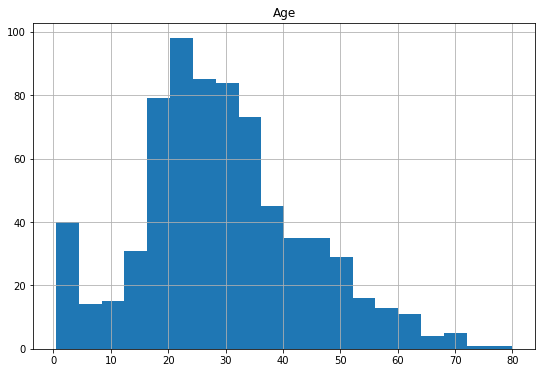

In [34]:
# 2. Replace the null values with some central value like the mean or median
# Try to find the distribution of Age by creating a histogram

titanic_train.hist(column='Age',  # column to plot
                  figsize=(9,6),  # plot size
                  bins=20)        # number of histogram bins

From the histogram, we see that ages between 20 and 30 are the most common, so filling in missing values with a central number like the mean or median wouldn't be entirely unreasonable. Let's fill in the missing values with the median value of 28:

In [36]:
new_age_var = np.where(titanic_train['Age'].isnull(),  # Logical check
                       28,                             # Value if check is true
                       titanic_train['Age'])           # value if check is false
titanic_train['Age'] = new_age_var
titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Outliers
Let's investigate 'Fare' variable using boxplot.


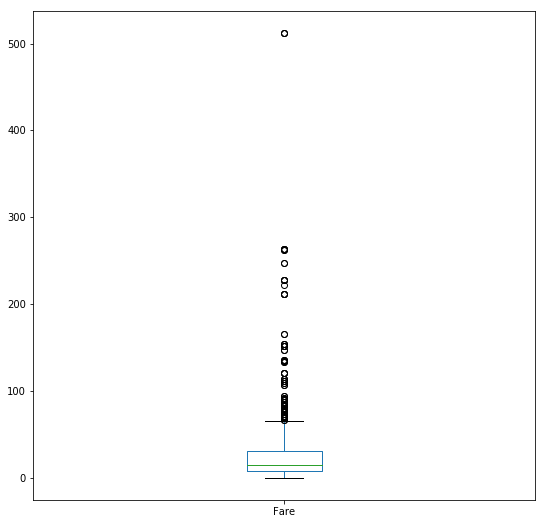

In [37]:
titanic_train['Fare'].plot(kind='box', figsize=(9,9))

In [40]:
# Few passengers have paid way too much. Let's get details
index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))
titanic_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


### Should I Create New Variables
Let's create a new variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents and children) a passenger has on board

In [46]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']
# For interest's sake, let's find out who had the most family members on board:
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))
titanic_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


There were 7 people on board with 8 siblings/spouses and 2 parents/children--they were probably all siblings of one another. Tragically, all 7 of them passed away. The 8th sibling is likely in the test data for which we are supposed make predictions. Would you predict that the final sibling survived or died?

### Wrap Up
In this lesson, we covered several general questions you should address when you first inspect a data set. Your first goal should be to explore the structure of the data to clean it and prepare the variables for your analysis. Once your data is it the right form, you can move from exploring structure to investigating relationships between variables.